# Uber Fare Price Prediction 

### **Objective of the Project**

The objective of this project is to **develop a machine learning model that accurately predicts cab fares** based on various factors, such as trip distance, time of the ride, passenger count, and other relevant features. This project aims to:

1. **Enhance Fare Transparency**:
   - Provide riders and drivers with fair and accurate fare estimates.
   - Improve customer satisfaction by reducing fare disputes.

2. **Support Operational Efficiency**:
   - Help cab companies better understand pricing dynamics.
   - Optimize route planning and pricing strategies.

3. **Explore Key Influencing Factors**:
   - Identify how variables like trip distance, time of day, or passenger count affect fares.
   - Uncover patterns and trends in cab fare data.

4. **Build a Reliable Prediction System**:
   - Compare the performance of different machine learning models (e.g., Linear Regression, Random Forest, Gradient Boosting) to identify the most effective approach for fare prediction.
   - Evaluate the models using error metrics (MAE, RMSE, R²) to ensure robustness.

5. **Real-World Applicability**:
   - Provide a scalable and practical solution that can be deployed in real-world systems to enhance cab fare prediction accuracy. 

Ultimately, the goal is to develop a model that performs well and generalizes effectively for unseen data, making it reliable for practical use.


### **What is Regression?**

**Regression** is a type of machine learning method used to find relationships between a **target variable** (something you want to predict) and one or more **input variables** (things that affect the target). It helps predict a continuous value, such as a house price, cab fare, or temperature.

Think of regression as finding the best line or curve that fits your data, so you can use it to make predictions.

---

### **Simpler Explanation**
- Imagine you have some points on a graph, where:
  - The **X-axis** represents something you know (e.g., distance of a trip).
  - The **Y-axis** represents something you want to predict (e.g., fare amount).
- Regression draws the best line (or curve) through these points to estimate values for new data.

---

### **Example**
If you know:
- Distance of a trip (input).
- Fare amount (output).

Regression finds the relationship between them, so you can predict the fare for any given distance.

---

### **Types of Regression**
1. **Linear Regression**: Draws a straight line through the data.
2. **Polynomial Regression**: Fits a curve to the data if the relationship is not straight.
3. **Multiple Regression**: Uses multiple inputs to predict one output.

---

### **Diagram**
Here’s an example of **Linear Regression**:

- **X-axis**: Trip Distance (km).  
- **Y-axis**: Cab Fare ($).  
- The line shows the relationship, helping to predict fares for any distance.

```plaintext
     |
 $20 |        o     
     |       o  o
 $15 |    o    o  
     |    o   o
 $10 | o  o 
     |  o
 $5  |o    
     |________________
      1   2   3   4   5 (km)
```

The line (or curve) helps estimate the fare for distances not in the data, like 3.5 km.

Let me know if you'd like a plotted diagram!

In [ ]:
# importing libraries 
import pandas as pd   #for data manipulation and analysis
import numpy as np    #for mathematical calculation
import matplotlib as plt #for data visualization
import seaborn as sns #for advanced data visualization
import warnings #to ignore warnings -- optional
warnings.filterwarnings("ignore")

In [5]:
uber_data = pd.read_csv(uber.csv)



In [7]:
data_overview = {
    "Shape of the dataset": uber_data.shape,
    "Column Names": uber_data.columns.tolist(),
    "Data Types": uber_data.dtypes.to_dict(),
    "First Few Rows": uber_data.head()
}

data_overview

{'Shape of the dataset': (200000, 9),
 'Column Names': ['Unnamed: 0',
  'key',
  'fare_amount',
  'pickup_datetime',
  'pickup_longitude',
  'pickup_latitude',
  'dropoff_longitude',
  'dropoff_latitude',
  'passenger_count'],
 'Data Types': {'Unnamed: 0': dtype('int64'),
  'key': dtype('O'),
  'fare_amount': dtype('float64'),
  'pickup_datetime': dtype('O'),
  'pickup_longitude': dtype('float64'),
  'pickup_latitude': dtype('float64'),
  'dropoff_longitude': dtype('float64'),
  'dropoff_latitude': dtype('float64'),
  'passenger_count': dtype('int64')},
 'First Few Rows':    Unnamed: 0                            key  fare_amount  \
 0    24238194    2015-05-07 19:52:06.0000003          7.5   
 1    27835199    2009-07-17 20:04:56.0000002          7.7   
 2    44984355   2009-08-24 21:45:00.00000061         12.9   
 3    25894730    2009-06-26 08:22:21.0000001          5.3   
 4    17610152  2014-08-28 17:47:00.000000188         16.0   
 
            pickup_datetime  pickup_longitude  p

In [9]:
# Checking for missing values
missing_values = uber_data.isnull().sum()

# Summary statistics for numerical columns
summary_statistics = uber_data.describe()

# Displaying the missing values and summary statistics
missing_values, summary_statistics


(Unnamed: 0           0
 key                  0
 fare_amount          0
 pickup_datetime      0
 pickup_longitude     0
 pickup_latitude      0
 dropoff_longitude    1
 dropoff_latitude     1
 passenger_count      0
 dtype: int64,
          Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
 count  2.000000e+05  200000.000000     200000.000000    200000.000000   
 mean   2.771250e+07      11.359955        -72.527638        39.935885   
 std    1.601382e+07       9.901776         11.437787         7.720539   
 min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
 25%    1.382535e+07       6.000000        -73.992065        40.734796   
 50%    2.774550e+07       8.500000        -73.981823        40.752592   
 75%    4.155530e+07      12.500000        -73.967154        40.767158   
 max    5.542357e+07     499.000000         57.418457      1644.421482   
 
        dropoff_longitude  dropoff_latitude  passenger_count  
 count      199999.000000     199999.0

In [11]:
# Dropping rows with missing values
uber_data_cleaned = uber_data.dropna()

# Confirmining no missing values remain
print("Missing values after cleaning:", uber_data_cleaned.isnull().sum())


Missing values after cleaning: Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


-----
**Condition 1:** uber_data_cleaned['fare_amount'] > 0

It removes rows where the fare is less than or equal to zero, as negative or zero fares don't make sense.
 
-----
**Condition 2:** uber_data_cleaned['fare_amount'] <= 200

It ensures the fare is not unreasonably high (above $200), as such fares might be errors or outliers.

By combining these two conditions with & (AND), it filters the data so that only rows with a fare amount between $0 and $200 are kept in the cleaned dataset (uber_data_cleaned).

-----





In [13]:
# Filtering fare amounts between reasonable limits 
uber_data_cleaned = uber_data_cleaned[(uber_data_cleaned['fare_amount'] > 0) & 
                                      (uber_data_cleaned['fare_amount'] <= 200)]



### Valid Latitude and Longitude Ranges
1. **Latitude**:  
   - The valid range for latitude is **-90 to 90 degrees**, as latitude measures how far north or south a location is from the equator.

2. **Longitude**:  
   - The valid range for longitude is **-180 to 180 degrees**, as longitude measures how far east or west a location is from the Prime Meridian.

### Step taken:
1. **Check Valid Latitude**:
   ```python
   valid_lat = (uber_data_cleaned['pickup_latitude'].between(-90, 90)) & \
               (uber_data_cleaned['dropoff_latitude'].between(-90, 90))
   ```
   - This checks that both the **pickup latitude** and **dropoff latitude** are within the valid range.

2. **Check Valid Longitude**:
   ```python
   valid_lon = (uber_data_cleaned['pickup_longitude'].between(-180, 180)) & \
               (uber_data_cleaned['dropoff_longitude'].between(-180, 180))
   ```
   - This ensures both the **pickup longitude** and **dropoff longitude** fall within the valid range.

3. **Filter Data**:
   ```python
   uber_data_cleaned = uber_data_cleaned[valid_lat & valid_lon]
   ```
   - Combines the latitude and longitude conditions (`valid_lat & valid_lon`) to keep only rows with valid pickup and dropoff coordinates.



In [15]:
# Validating latitude and longitude ranges
valid_lat = (uber_data_cleaned['pickup_latitude'].between(-90, 90)) & \
            (uber_data_cleaned['dropoff_latitude'].between(-90, 90))
valid_lon = (uber_data_cleaned['pickup_longitude'].between(-180, 180)) & \
            (uber_data_cleaned['dropoff_longitude'].between(-180, 180))

# Filtering valid latitude and longitude
uber_data_cleaned = uber_data_cleaned[valid_lat & valid_lon]



----
1. **Condition 1**: `(uber_data_cleaned['passenger_count'] > 0)`  
   - This keeps only rows where the passenger count is greater than 0.  
   - Trips with 0 or negative passenger counts are invalid and likely errors in the data.

2. **Condition 2**: `(uber_data_cleaned['passenger_count'] <= 6)`  
   - This ensures the passenger count is not more than 6.  
   - Most cabs typically accommodate a maximum of 6 passengers.

3. **Combine the Conditions**:  
   The two conditions are combined using the `&` (AND) operator:
   ```python
   (uber_data_cleaned['passenger_count'] > 0) & (uber_data_cleaned['passenger_count'] <= 6)
   ```

4. **Filter the Data**:  
   The dataset `uber_data_cleaned` is updated to include only rows that satisfy both conditions.  
   ```python
   uber_data_cleaned = uber_data_cleaned[...]
   ```



In [17]:
# Restricting passenger count to a reasonable range (1 to 6 for typical cabs)
uber_data_cleaned = uber_data_cleaned[(uber_data_cleaned['passenger_count'] > 0) & 
                                      (uber_data_cleaned['passenger_count'] <= 6)]



### Step 1: Convert `pickup_datetime` to DateTime Format
```python
uber_data_cleaned['pickup_datetime'] = pd.to_datetime(uber_data_cleaned['pickup_datetime'])
```
- **Why?**  
  The `pickup_datetime` column is initially a string (text) format. To work with it effectively (e.g., extract time features), it needs to be converted to a pandas `datetime` object.
- **Result:**  
  After conversion, you can easily extract specific components like hour, day, month, or year.

---

### Step 2: Extract Temporal Features
1. **Extract Pickup Hour**:
   ```python
   uber_data_cleaned['pickup_hour'] = uber_data_cleaned['pickup_datetime'].dt.hour
   ```
   - Retrieves the hour of the day (0-23) when the trip started.

2. **Extract Pickup Day**:
   ```python
   uber_data_cleaned['pickup_day'] = uber_data_cleaned['pickup_datetime'].dt.day
   ```
   - Retrieves the day of the month (1-31) when the trip started.

3. **Extract Pickup Month**:
   ```python
   uber_data_cleaned['pickup_month'] = uber_data_cleaned['pickup_datetime'].dt.month
   ```
   - Retrieves the month (1-12) when the trip started.

4. **Extract Pickup Year**:
   ```python
   uber_data_cleaned['pickup_year'] = uber_data_cleaned['pickup_datetime'].dt.year
   ```
   - Retrieves the year when the trip started.

---



In [19]:
# Converting pickup_datetime to datetime format
uber_data_cleaned['pickup_datetime'] = pd.to_datetime(uber_data_cleaned['pickup_datetime'])

# Extracting temporal features
uber_data_cleaned['pickup_hour'] = uber_data_cleaned['pickup_datetime'].dt.hour
uber_data_cleaned['pickup_day'] = uber_data_cleaned['pickup_datetime'].dt.day
uber_data_cleaned['pickup_month'] = uber_data_cleaned['pickup_datetime'].dt.month
uber_data_cleaned['pickup_year'] = uber_data_cleaned['pickup_datetime'].dt.year




#### 1. Import the Geopy Library
```python
from geopy.distance import geodesic
```
- **What it does**: Geopy provides tools to compute distances between geographical coordinates (latitude and longitude).  
- **Geodesic distance**: The shortest distance between two points on the surface of a sphere, measured along the Earth's curvature.

---

#### 2. Define the Distance Calculation Function
```python
def calculate_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup, dropoff).km
```
- **Purpose**: Calculates the geodesic distance for a single trip (row in the dataset).
- **How it works**:
  1. Takes the `pickup_latitude` and `pickup_longitude` as a tuple for the pickup location.
  2. Takes the `dropoff_latitude` and `dropoff_longitude` as a tuple for the dropoff location.
  3. Uses the `geodesic` function to calculate the distance between the two points in kilometers.

---

#### 3. Apply the Function to Each Row
```python
uber_data_cleaned['trip_distance_km'] = uber_data_cleaned.apply(calculate_distance, axis=1)
```
- **What it does**:
  - The `.apply()` method runs the `calculate_distance` function on each row of the dataframe.
  - `axis=1` ensures that the function is applied row-wise (i.e., to each trip).
-   Adds a new column `trip_distance_km` to the dataset containing the calculated distance for each trip.

---

### Why Calculate Distance?
- **Insights**: Helps analyze trip lengths and detect anomalies (e.g., extremely short or long trips).
- **Feature for Prediction**: Distance is a crucial variable for fare prediction, as longer trips generally cost more.
  
---

In [25]:
from geopy.distance import geodesic

# Function to calculate geodesic distance
def calculate_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup, dropoff).km

# Applying distance calculation
uber_data_cleaned['trip_distance_km'] = uber_data_cleaned.apply(calculate_distance, axis=1)



---

### **1. Importing the Train-Test Split Function**
```python
from sklearn.model_selection import train_test_split
```
- **Purpose**: This function splits the dataset into training and testing subsets, ensuring the model is trained and evaluated on separate data for fair testing.

---

### **2. Define Features and Target**
```python
features = uber_data_cleaned[['trip_distance_km', 'pickup_hour', 'pickup_day', 
                               'pickup_month', 'pickup_year', 'passenger_count']]
target = uber_data_cleaned['fare_amount']
```
- **Features**: These are the independent variables (inputs) that the model will use to predict the target. Here:
  - `trip_distance_km`: Distance of the trip in kilometers.
  - `pickup_hour`: Hour of the day the trip started.
  - `pickup_day`: Day of the month the trip started.
  - `pickup_month`: Month of the year the trip started.
  - `pickup_year`: Year the trip started.
  - `passenger_count`: Number of passengers on the trip.

- **Target**: This is the dependent variable (output) the model will predict, which is `fare_amount` (the trip cost).

---

### **3. Split Data into Training and Testing Sets**
```python
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
```
- **Parameters**:
  - `features`: The independent variables (`X`).
  - `target`: The dependent variable (`y`).
  - `test_size=0.2`: Reserves **20% of the data** for testing, leaving 80% for training.
  - `random_state=42`: Sets a random seed for reproducibility. Using the same seed ensures consistent splits every time the code runs.

- **Outputs**:
  - `X_train`: Training data for features (80% of the rows).
  - `X_test`: Testing data for features (20% of the rows).
  - `y_train`: Training data for the target (80% of the rows).
  - `y_test`: Testing data for the target (20% of the rows).

---

### **Why Split the Data?**
1. **Training Set**: Used to train the model and help it learn patterns in the data.
2. **Testing Set**: Used to evaluate the model's performance on unseen data, ensuring it generalizes well and isn't overfitted.



In [27]:
from sklearn.model_selection import train_test_split

# Defining features and target
features = uber_data_cleaned[['trip_distance_km', 'pickup_hour', 'pickup_day', 
                               'pickup_month', 'pickup_year', 'passenger_count']]
target = uber_data_cleaned['fare_amount']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



---

### **1. Import the Linear Regression Model**
```python
from sklearn.linear_model import LinearRegression
```
- **LinearRegression**: A machine learning algorithm that assumes a linear relationship between the features (independent variables) and the target (dependent variable). It tries to fit a straight line (or hyperplane in higher dimensions) to minimize the prediction error.

---

### **2. Initialize the Model**
```python
model = LinearRegression()
```
- Creates an instance of the `LinearRegression` model.
- At this stage, the model is untrained and only prepared for training.

---

### **3. Train the Model**
```python
model.fit(X_train, y_train)
```
- **Purpose**: The `.fit()` method trains the model by learning the relationship between the input features (`X_train`) and the target variable (`y_train`).
- The model calculates the best-fit line by minimizing the error (the difference between predicted and actual values) for the training data.

---

### **4. Make Predictions**
```python
y_pred = model.predict(X_test)
```
- **Purpose**: The `.predict()` method uses the trained model to predict the target variable (`fare_amount`) for the unseen test data (`X_test`).
- **Output**: `y_pred` contains the predicted values of `fare_amount` for the test set.

---

1. **Training the Model**: The model learns the patterns in the training data, such as how trip distance and time of day influence fare amounts.
2. **Testing the Model**: Making predictions on unseen test data helps evaluate how well the model generalizes to new, real-world data.



In [29]:
from sklearn.linear_model import LinearRegression

# Initializing linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)



---

### **1. Import the Evaluation Metrics**
```python
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
```
- These metrics are commonly used to evaluate regression models.

---

### **2. Calculate Metrics**
1. **Mean Absolute Error (MAE)**:
   ```python
   mae = mean_absolute_error(y_test, y_pred)
   ```
   - **What it measures**: The average of the absolute differences between the predicted values (`y_pred`) and the actual values (`y_test`).
   - **Interpretation**: Lower MAE means the model's predictions are closer to the actual values.

2. **Mean Squared Error (MSE)**:
   ```python
   mse = mean_squared_error(y_test, y_pred)
   ```
   - **What it measures**: The average of the squared differences between `y_pred` and `y_test`.
   - **Interpretation**: Penalizes larger errors more than MAE because it squares the differences. Lower MSE indicates better performance.

3. **Root Mean Squared Error (RMSE)**:
   ```python
   rmse = mse ** 0.5
   ```
   - **What it measures**: The square root of MSE, which brings the units back to the same scale as the target variable (`fare_amount`).
   - **Interpretation**: Lower RMSE indicates more accurate predictions.

4. **R-squared (R²)**:
   ```python
   r2 = r2_score(y_test, y_pred)
   ```
   - **What it measures**: The proportion of variance in the target variable explained by the model.
   - **Range**:
     - **1.0**: Perfect fit (all variance is explained).
     - **0.0**: No explanatory power (model as good as predicting the mean).
     - Negative values: Model performs worse than simply predicting the mean.
   - **Interpretation**: Higher R² indicates a better fit.

---

### **3. Display Metrics**
```python
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"R² Score: {r2}")
```
- Displays the calculated metrics for easy interpretation.

---

### **Why These Metrics?**
- **MAE**: Simple to understand and gives a direct idea of average prediction error.
- **MSE/RMSE**: Penalizes larger errors, making it useful when large deviations are undesirable.
- **R²**: Explains the proportion of variance captured by the model, providing an overall measure of goodness of fit.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Displaying metrics
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")



---

### **1. Import Required Tools**
We import tools to:
- Build models (Linear Regression, Decision Trees, Random Forests, Gradient Boosting, XGBoost).
- Measure how well the models predict fares (error metrics like MAE, RMSE, R²).

---

### **2. List of Models**
We create a dictionary of models:
```python
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}
```
- Each key is the model name.
- Each value is the actual machine learning model.

---

### **3. Train and Test Models**
For each model:
1. **Train the model** using the training data (`X_train` and `y_train`):
   ```python
   model.fit(X_train, y_train)
   ```
   - The model learns the relationship between the input features (e.g., trip distance) and the target (fare).

2. **Make Predictions** on the test data (`X_test`):
   ```python
   y_pred_model = model.predict(X_test)
   ```
   - The model uses what it learned to predict fares for unseen data.

3. **Evaluate Performance**:
   Calculate metrics to measure how close the predictions (`y_pred_model`) are to the actual fares (`y_test`):
   - **MAE** (Mean Absolute Error): Average of how far the predictions are from actual fares.
   - **MSE** (Mean Squared Error): Penalizes large errors more than MAE.
   - **RMSE** (Root Mean Squared Error): Same as MSE but in the same units as fares.
   - **R²** (R-squared): Measures how well the model explains the variations in the data. A value closer to 1 is better.

4. **Save Results**:
   Save the model’s performance in a results dictionary.

---

### **4. Organize and Display Results**
- Convert the `results` dictionary into a DataFrame (like a table).
- Sort the models by their R² score (best-performing models at the top).

---


In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Training and evaluating each model
results = {}
for model_name, model in models.items():
    # Training  model
    model.fit(X_train, y_train)
    
    # Making predictions
    y_pred_model = model.predict(X_test)
    
    # Evaluating metrics
    mae = mean_absolute_error(y_test, y_pred_model)
    mse = mean_squared_error(y_test, y_pred_model)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred_model)
    
    # Storing results
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    }

# Displaying results
results_df = pd.DataFrame(results).T
results_df.sort_values(by="R²", ascending=False)


,MAE,MSE,RMSE,R²
Gradient Boosting,2.216255,22.282866,4.720473,0.764798
Random Forest,2.393889,24.666008,4.966488,0.739643
XGBoost,2.315372,27.132921,5.208927,0.713604
Decision Tree,3.263503,49.016530,7.001181,0.482615
Linear Regression,5.965913,93.315833,9.660012,0.015023


## What is Hyperparameter Tuning?
Hyperparameter tuning involves selecting the best values for the hyperparameters of a machine learning model. Hyperparameters are settings or configurations of the model (e.g., n_estimators, max_depth) that are not learned from the data but need to be set before training.

The code below uses **RandomizedSearchCV** to perform hyperparameter tuning for the **Gradient Boosting Regressor**. RandomizedSearchCV tries a random selection of hyperparameter combinations and finds the one that performs best on a given scoring metric. 

---

### **1. Define the Hyperparameter Grid**
```python
param_dist = {
    'n_estimators': np.arange(100, 301, 50),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
```
  - Defines the range of hyperparameters to test.
  - Instead of testing every possible combination (as in Grid Search), RandomizedSearchCV will test a random selection of combinations.

- **Parameters in the grid**:
  - **`n_estimators`**: Number of decision trees (values: 100, 150, 200, 250, 300).
  - **`learning_rate`**: Step size for updating weights (values: 0.01, 0.05, 0.1).
  - **`max_depth`**: Maximum depth of each decision tree (values: 3, 5, 7).
  - **`min_samples_split`**: Minimum samples required to split a node (values: 2, 5, 10).
  - **`min_samples_leaf`**: Minimum samples in a leaf node (values: 1, 2, 4).

---

### **2. Initialize RandomizedSearchCV**
```python
random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist,
    scoring='neg_mean_absolute_error',
    n_iter=20,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)
```
-  Creates the RandomizedSearchCV object to test random combinations of the hyperparameters.

- **Key Parameters**:
  - **`estimator`**: The model to tune (Gradient Boosting Regressor in this case).
  - **`param_distributions`**: The hyperparameter grid defined earlier.
  - **`scoring='neg_mean_absolute_error'`**: Evaluates model performance using **Mean Absolute Error (MAE)**. The negative sign is used because scikit-learn optimizes for higher scores, but MAE is better when it's lower.
  - **`n_iter=20`**: Tests 20 random combinations of hyperparameters.
  - **`cv=3`**: Uses 3-fold cross-validation for each combination.
  - **`verbose=2`**: Displays progress logs during tuning.
  - **`n_jobs=-1`**: Uses all available CPU cores to speed up the search.
  - **`random_state=42`**: Ensures consistent results by fixing the random seed.

---

### **3. Fit the Model**
```python
random_search.fit(X_train, y_train)
```
- : Fits the RandomizedSearchCV on the training data.
  - For each of the 20 random hyperparameter combinations, the model is trained and evaluated using 3-fold cross-validation.
  - The combination with the best score is saved.

---

### **4. Get the Best Hyperparameters and Score**
```python
best_params = random_search.best_params_
best_score = -random_search.best_score_  # Convert negative MAE to positive
print("Best Parameters:", best_params)
print("Best MAE:", best_score)
```
- **`best_params`**: The hyperparameters that gave the best performance.
- **`best_score`**: The best cross-validated Mean Absolute Error achieved by these parameters. The negative value is converted back to positive for readability.

---

### **Why Use RandomizedSearchCV?**
1. **Efficient**: Tests a random subset of hyperparameters instead of all combinations, saving time.
2. **Customizable**: You can specify the number of random combinations (`n_iter`) to control the search duration.
3. **Cross-Validation**: Ensures the results are not biased by the specific train-test split.

---

- You get the best hyperparameter combination for the Gradient Boosting Regressor.
- These optimized parameters can be used to retrain the final model for better accuracy.


In [52]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Defining the parameter grid
param_dist = {
    'n_estimators': np.arange(100, 301, 50),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist,
    scoring='neg_mean_absolute_error',
    n_iter=20,  # Number of random combinations to test
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and best score
best_params = random_search.best_params_
best_score = -random_search.best_score_  # Convert to positive
print("Best Parameters:", best_params)
print("Best MAE:", best_score)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.05}
Best MAE: 2.187402483017015


In [54]:
# Training the model with best parameters
final_model = GradientBoostingRegressor(
    n_estimators=250,
    min_samples_split=5,
    min_samples_leaf=4,
    max_depth=5,
    learning_rate=0.05,
    random_state=42
)

final_model.fit(X_train, y_train)

# Predicting on the test set
final_y_pred = final_model.predict(X_test)

# Evaluating the model
final_mae = mean_absolute_error(y_test, final_y_pred)
final_mse = mean_squared_error(y_test, final_y_pred)
final_rmse = final_mse ** 0.5
final_r2 = r2_score(y_test, final_y_pred)

# Displaying the metrics
print(f"Final MAE: {final_mae}")
print(f"Final MSE: {final_mse}")
print(f"Final RMSE: {final_rmse}")
print(f"Final R²: {final_r2}")


Final MAE: 2.1928612141312693
Final MSE: 22.013900544485026
Final RMSE: 4.691897328851626
Final R²: 0.7676365166104603


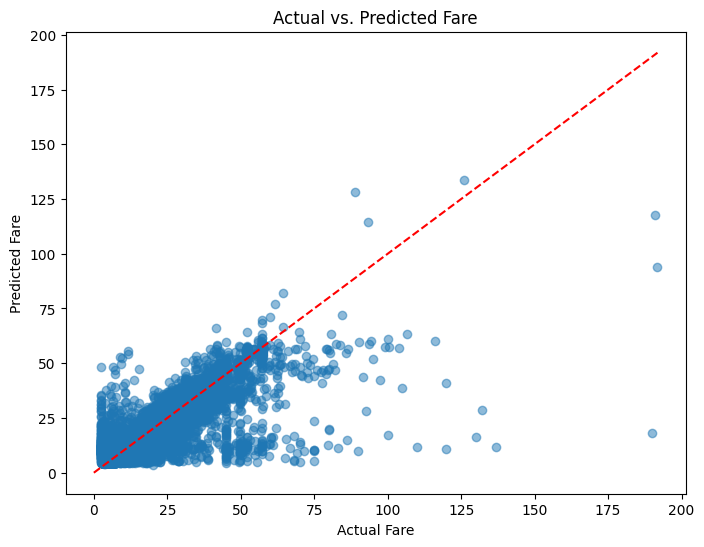

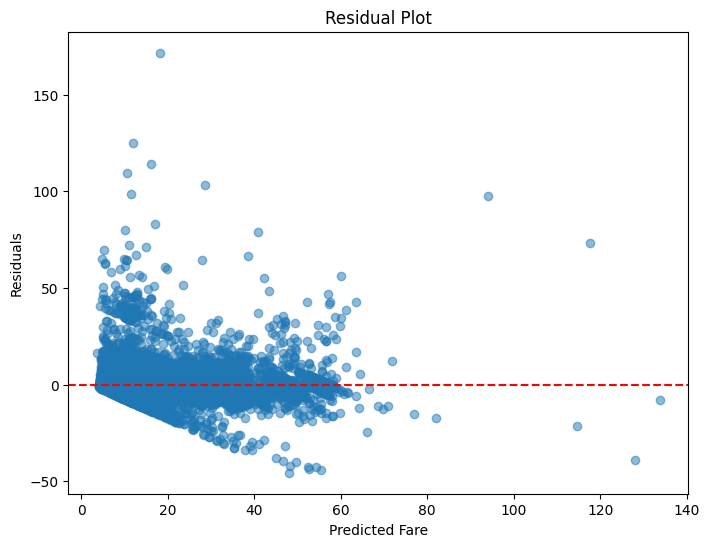

In [56]:
import matplotlib.pyplot as plt

# Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_y_pred, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs. Predicted Fare")
plt.show()

# Residual Plot
residuals = y_test - final_y_pred
plt.figure(figsize=(8, 6))
plt.scatter(final_y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [58]:
import joblib

# Exporting the trained Gradient Boosting model
model_file_path = 'uber_gradient_boosting_model.pkl'
joblib.dump(final_model, model_file_path)

model_file_path


'uber_gradient_boosting_model.pkl'